<h1 style="font-size:36px;">Data exploration of INSPIRE, a publicly available research dataset for perioperative medicine</h1>

<h2 style="font-size:20px;">In this script data exploration and analysis of ""vitals.csv" is shown</h2>

link: https://physionet.org/content/inspire/0.1/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  # Example, importing datasets module
import tensorflow as tf
import torch
import keras
import scipy
import statsmodels
import ipywidgets as widgets
import ipympl
%matplotlib widget

print("Libraries Imported")


Libraries Imported


In [2]:
df_vitals_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\vitals.csv')

In [3]:
df_vitals = df_vitals_original.copy()

In [4]:
df_vitals.head(30)


,op_id,subject_id,chart_time,item_name,value
0,435959808,181409183,1985,minvol,4.8
1,435959808,181409183,1985,vt,520.0
2,435959808,181409183,1985,rr,9.0
3,435959808,181409183,1985,pip,23.0
4,435959808,181409183,2005,minvol,4.5
5,435959808,181409183,2005,vt,520.0
6,435959808,181409183,2005,rr,9.0
7,435959808,181409183,2005,pip,24.0
8,435959808,181409183,2020,minvol,4.5
9,435959808,181409183,2020,vt,520.0


In [5]:
unique_subject_ids = df_vitals['subject_id'].nunique()
print(unique_subject_ids)

99886


In [6]:
subject_id_counts = df_vitals['subject_id'].value_counts()
first_five_subject_ids = subject_id_counts.head(30)
print(first_five_subject_ids)

subject_id
162327943    16193
114945220    15117
189784570    14176
109801041    13546
109459182    13332
124070503    12952
168230680    12795
149673433    12731
198868043    11853
181462224    11071
148998150    10885
188384371    10042
174724211     9819
180662611     9721
128054712     9564
168207873     9563
195759251     9346
123669763     9326
141830650     9220
158261582     8991
120738743     8930
154413694     8911
135312343     8854
173407442     8837
166571951     8655
134147754     8602
142340863     8542
156110181     8534
157756183     8469
103403470     8386
Name: count, dtype: int64


In [7]:
unique_subject_ids = df_vitals['op_id'].nunique()
print(unique_subject_ids)

131078


In [8]:
df_vitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66127940 entries, 0 to 66127939
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   op_id       int64  
 1   subject_id  int64  
 2   chart_time  int64  
 3   item_name   object 
 4   value       float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.5+ GB


In [9]:
df_vitals.describe()

,op_id,subject_id,chart_time,value
count,6.612794e+07,6.612794e+07,6.612794e+07,6.612794e+07
mean,4.501949e+08,1.500362e+08,2.081616e+05,6.578803e+01
std,2.899169e+07,2.880297e+07,6.485078e+05,7.255515e+03
min,4.000005e+08,1.000008e+08,-1.440000e+03,-3.276700e+04
25%,4.249949e+08,1.251254e+08,2.260000e+03,1.000000e+01
50%,4.503567e+08,1.501092e+08,3.605000e+03,3.540000e+01
75%,4.754103e+08,1.749456e+08,9.470000e+03,8.050000e+01
max,4.999990e+08,1.999994e+08,5.185440e+06,5.422222e+07


In [10]:
df_vitals.columns

Index(['op_id', 'subject_id', 'chart_time', 'item_name', 'value'], dtype='object')

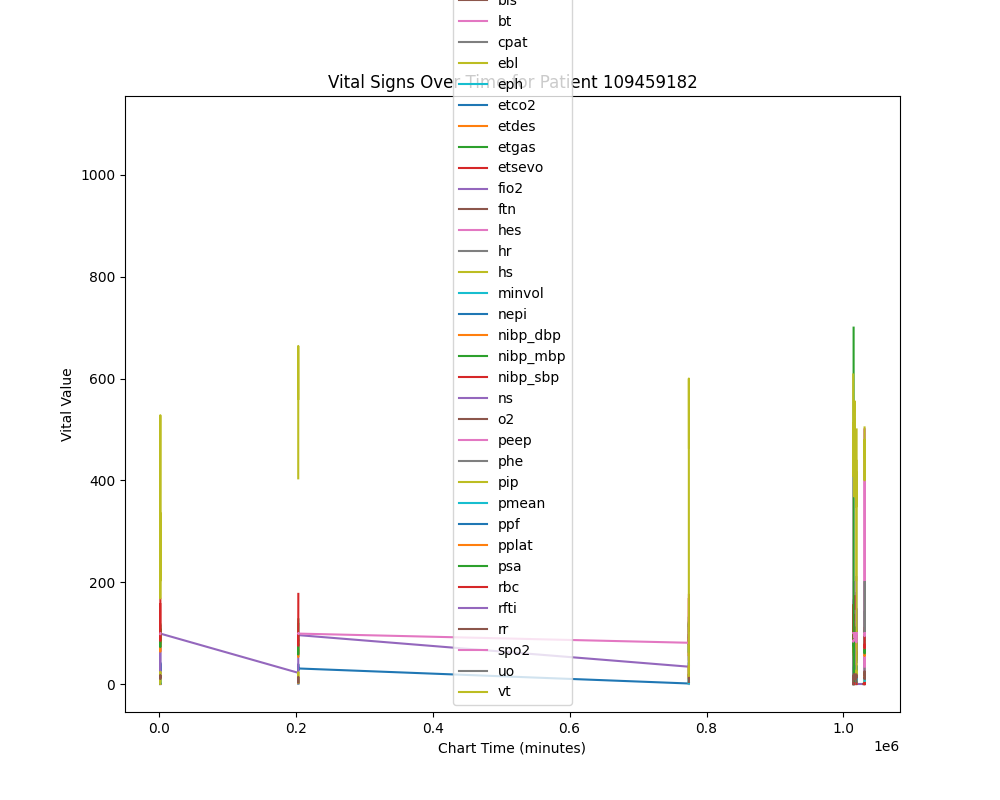

In [11]:
# Assuming df_vitals is your DataFrame
# Plot vitals for a single patient
def plot_patient_vitals(patient_id, df):
    patient_data = df[df['subject_id'] == patient_id]

    # Using pivot_table to handle duplicate entries
    # Here, you can change the 'aggfunc' to 'mean', 'sum', etc., depending on your requirement
    patient_vitals_pivot = patient_data.pivot_table(index='chart_time', columns='item_name', values='value', aggfunc='mean')

    # Plot each vital parameter
    plt.figure(figsize=(10, 8))
    for column in patient_vitals_pivot.columns:
        plt.plot(patient_vitals_pivot.index, patient_vitals_pivot[column], label=column)
    
    plt.xlabel('Chart Time (minutes)')
    plt.ylabel('Vital Value')
    plt.title(f'Vital Signs Over Time for Patient {patient_id}')
    plt.legend()
    plt.show()

# Plot vitals for a specific patient
plot_patient_vitals(109459182, df_vitals)

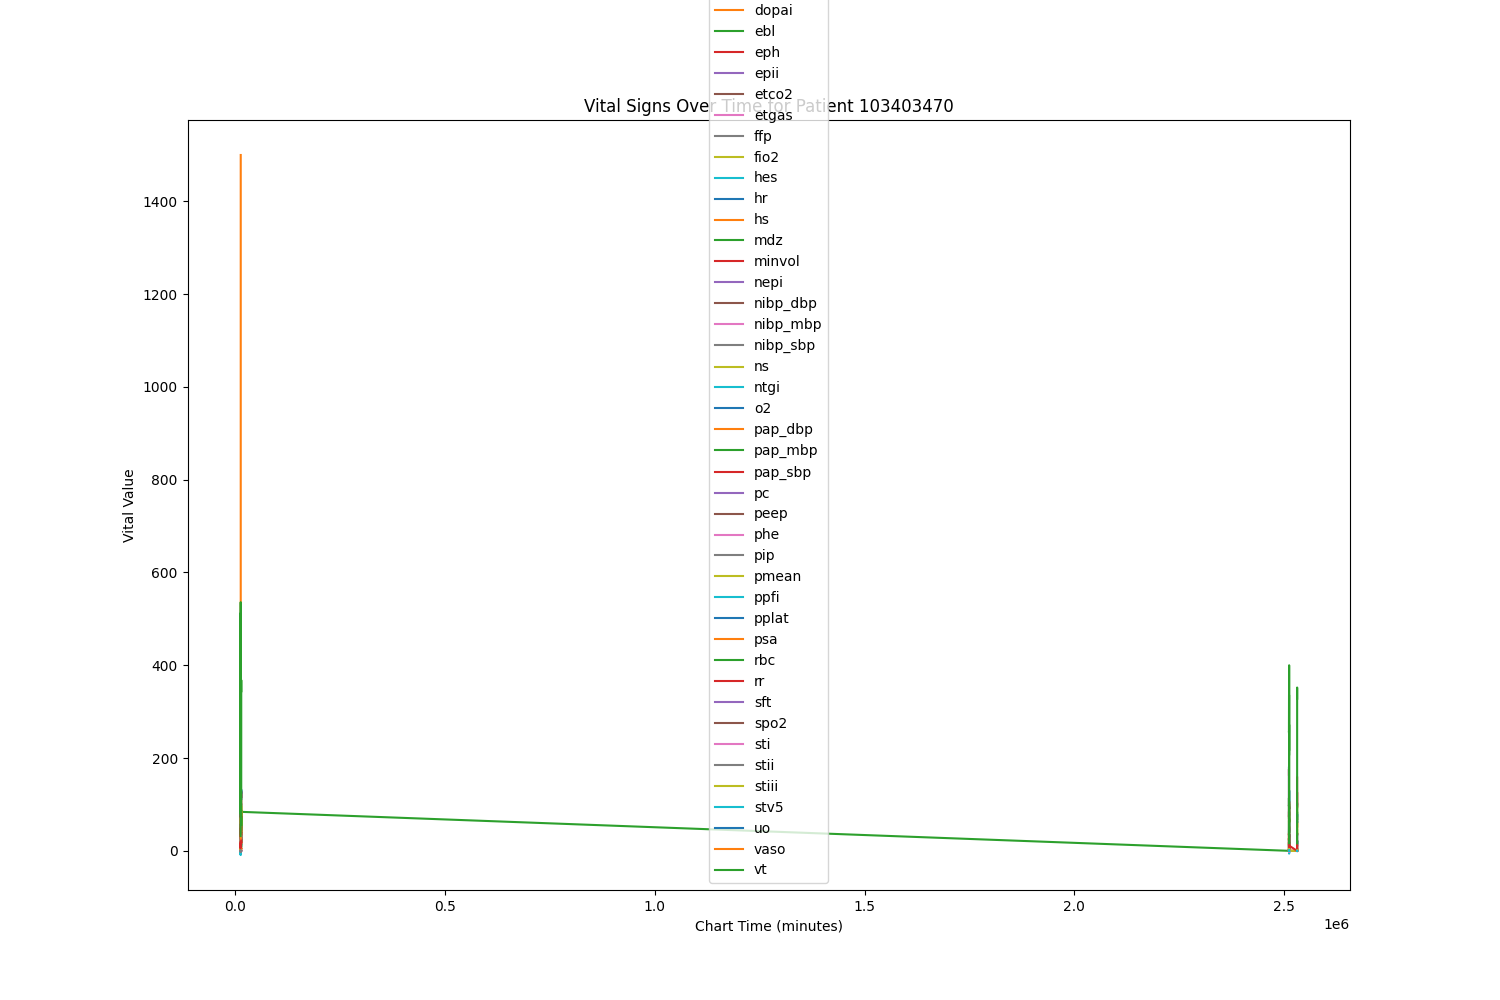

In [12]:
# Assuming df_vitals is your DataFrame
# Plot vitals for a single patient
def plot_patient_vitals(patient_id, df):
    patient_data = df[df['subject_id'] == patient_id]

    # Using pivot_table to handle duplicate entries
    # Here, you can change the 'aggfunc' to 'mean', 'sum', etc., depending on your requirement
    patient_vitals_pivot = patient_data.pivot_table(index='chart_time', columns='item_name', values='value', aggfunc='mean')

    # Plot each vital parameter
    plt.figure(figsize=(15, 10))
    for column in patient_vitals_pivot.columns:
        plt.plot(patient_vitals_pivot.index, patient_vitals_pivot[column], label=column)
    
    plt.xlabel('Chart Time (minutes)')
    plt.ylabel('Vital Value')
    plt.title(f'Vital Signs Over Time for Patient {patient_id}')
    plt.legend()
    plt.show()

# Plot vitals for a specific patient
plot_patient_vitals(103403470, df_vitals)

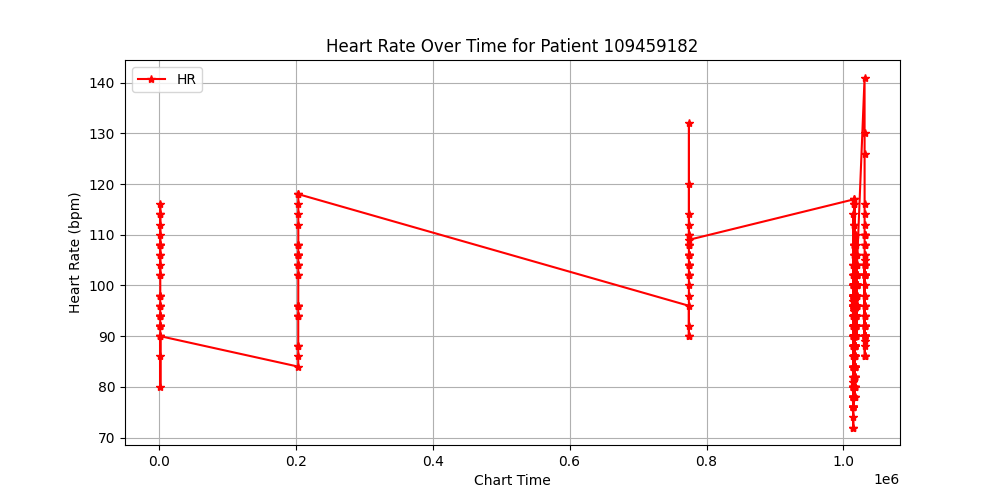

count    6.612794e+07
mean     2.081616e+05
std      6.485078e+05
min     -1.440000e+03
25%      2.260000e+03
50%      3.605000e+03
75%      9.470000e+03
max      5.185440e+06
Name: chart_time, dtype: float64


In [13]:
def plot_patient_hr(patient_id, df):
    # Filter for the patient and the item_name 'hr' for heart rate
    patient_hr_data = df[(df['subject_id'] == patient_id) & (df['item_name'] == 'hr')]

    # Plot heart rate
    plt.figure(figsize=(10, 5))
    plt.plot(patient_hr_data['chart_time'], patient_hr_data['value'], label='HR', color='red', marker='*')
    
    plt.xlabel('Chart Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.title(f'Heart Rate Over Time for Patient {patient_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_patient_hr(109459182, df_vitals) # Replace 'df_vitals' with your actual DataFrame variable name

# Check for unusual 'chart_time' values
print(df_vitals['chart_time'].describe())


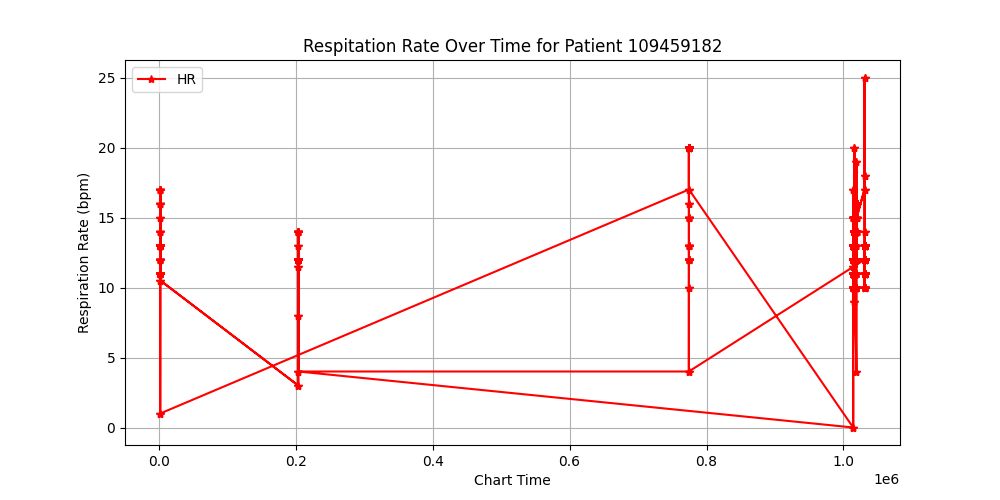

In [14]:
def plot_patient_hr(patient_id, df):
    # Filter for the patient and the item_name 'hr' for heart rate
    patient_hr_data = df[(df['subject_id'] == patient_id) & (df['item_name'] == 'rr')]

    # Plot heart rate
    plt.figure(figsize=(10, 5))
    plt.plot(patient_hr_data['chart_time'], patient_hr_data['value'], label='HR', color='red', marker='*')
    
    plt.xlabel('Chart Time')
    plt.ylabel('Respiration Rate (bpm)')
    plt.title(f'Respitation Rate Over Time for Patient {patient_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_patient_hr(109459182, df_vitals) # Replace 'df_vitals' with your actual DataFrame variable name


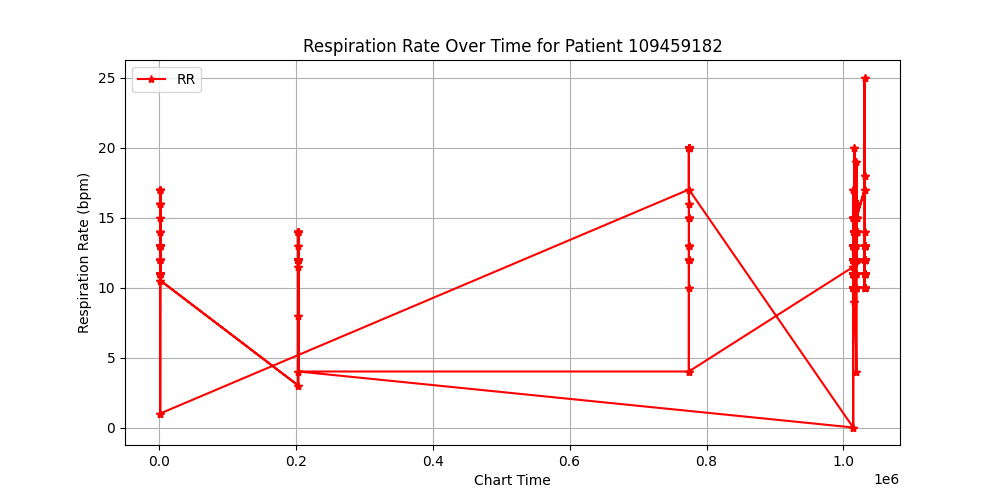

count    6.612794e+07
mean     2.081616e+05
std      6.485078e+05
min     -1.440000e+03
25%      2.260000e+03
50%      3.605000e+03
75%      9.470000e+03
max      5.185440e+06
Name: chart_time, dtype: float64


In [15]:
def plot_patient_hr(patient_id, df):
    # Filter for the patient and the item_name 'hr' for heart rate
    patient_hr_data = df[(df['subject_id'] == patient_id) & (df['item_name'] == 'rr')]

    # Plot heart rate
    plt.figure(figsize=(10, 5))
    plt.plot(patient_hr_data['chart_time'], patient_hr_data['value'], label='RR', color='red', marker='*')
    
    plt.xlabel('Chart Time')
    plt.ylabel('Respiration Rate (bpm)')
    plt.title(f'Respiration Rate Over Time for Patient {patient_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_patient_hr(109459182, df_vitals) # Replace 'df_vitals' with your actual DataFrame variable name

# Check for unusual 'chart_time' values
print(df_vitals['chart_time'].describe())



